In [85]:
import numpy as np
import time

y1 = np.array([np.random.rand(300, 3) for _ in range(500)])
y2 = np.array([x.T for x in y1])
squarer = lambda x: np.matmul(x, x.T)
t = time.time()
# z = 1/(500-1)*np.sum(list(map(squarer, y1)), axis=0)
z = 1/(500-1)*np.sum([np.matmul(e, e.T) for e in y1], axis=0)
print(np.shape(z))
print(time.time()-t)

(300, 300)
0.6061577796936035


In [87]:
print(y2.shape)
c = 1/(500-1)*np.sum(np.matmul(y1, y2), axis=0)
print(c.shape)
print(np.mean(np.abs(z-c)))

(500, 3, 300)
(300, 300)
0.0


In [95]:
t = time.time()
c = 1/(500-1)*np.sum(y1 @ y2, axis=0)
print(time.time()-t)

0.8420624732971191


In [35]:
x = np.random.normal(size=(300, 3), scale=r)
x.shape

(300, 3)

In [23]:
np.array(forecast_ensemble).shape

(5, 300, 3)

In [24]:
mean_forecast = np.mean(forecast_ensemble, axis = 0)
mean_forecast.shape
errors = [f-mean_forecast for f in forecast_ensemble]

In [25]:
pf = 1/(N-1) * np.sum(
    [e @ e.T for e in errors],
    axis = 0
)
pf.shape

(300, 300)

In [26]:
R = np.diag(np.ones(RandomSimulationConfig.n_particles))*r

In [29]:
K = pf*np.linalg.inv(pf+R)
K.shape

(300, 300)

In [30]:
ensemble_update = [
    x + K @ (z-x) for x, z in zip(forecast_ensemble, virtual_observations)
]

In [33]:
new_state = np.mean(ensemble_update, axis = 0)
new_state.shape

(300, 3)

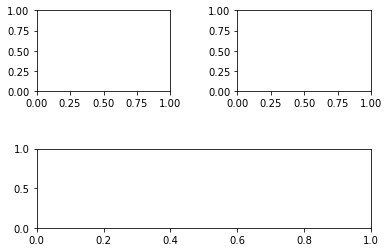

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,4))

gst = gridspec.GridSpec(nrows=1, ncols=2, bottom=0.6, wspace=0.5)
gsb = gridspec.GridSpec(nrows=1, ncols=1, top=0.4)

axst=[0]*2
axsb=[0]

axst[0] = fig.add_subplot(gst[0])
axst[1] = fig.add_subplot(gst[1])

axsb[0] = fig.add_subplot(gsb[0])

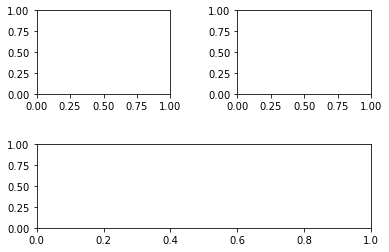

In [12]:
fig = plt.figure(figsize=(6,4))

gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=0.5,hspace=0.6)

axs = [0]*3

axs[0]=fig.add_subplot(gs[0,0])
axs[1]=fig.add_subplot(gs[0,1])
axs[2]=fig.add_subplot(gs[1,:])

